# 2.1 - Testeo de hipotesis

##### Recordatorio

+ Población => Todos los elementos (normalmente desconocido)
+ Muestra => Subconjunto de la población

# Hipótesis

+ **H0**

Hipótesis nula. (H0). H0 es el status quo, el mainstream, la hipótesis a vencer por el investigador.


+ **H1**

Hipótesis alternativa. (H1). H1 es la nueva hipótesis, la del investigador.

# Tipos de tests

**1)** (one-side)

$$H0: \mu \geq k$$
$$H1: \mu < k$$

**2)** (one-side)

$$H0: \mu \leq k$$
$$H1: \mu > k$$

**3)** (two-side)

$$H0: \mu = k$$
$$H1: \mu ≠ k$$

# Suposiciones para el testeo

**1)**

Observaciones independientes. (Para evitar sesgos)

**2)**

Normalidad de los datos. ($N(\mu, \sigma)$)

Teorema Central del Limite

**3)**

Tamaño adecuado de la muestra. (30)

**Tamaño de la muestra**

https://es.wikipedia.org/wiki/Tama%C3%B1o_de_la_muestra

**4)**

Para usar la $N(\mu, \sigma)$, debemos conocer $\sigma$ (desviacion estandar de la poblacion).Si $\sigma$ es desconocida, se usa la t-Student para el testeo de hipotesis, lo que implica usar s (desviacion estandar muestral, n-1).

# Test (estadistico)

+ $N(\mu, \sigma)$ , $Z-test$

$$z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $\sigma$ es la std poblacional
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{\sigma}{\sqrt{n}}$ se le llama error estandar

+ t-Student , $t-test$

$$t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $s$ es la std muestral
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{s}{\sqrt{n}}$ se le llama error estandar muestral

# P-value

**p-value** = es la probabilidad correspondiente al estadistico de ser posible bajo H0.

$$pvalue > umbral => H0$$
$$pvalue < umbral => H1$$

El umbral esta determinado por el intervalo de confianza.

In [1]:
import pylab as plt
from scipy.stats import norm

In [2]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -2, 1) for x in x]
y2=[norm.pdf(x, 2, 1) for x in x]

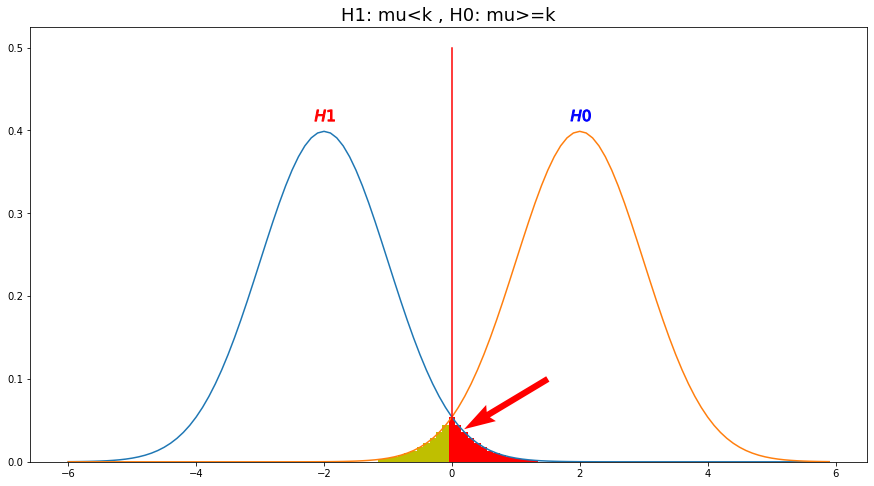

In [3]:
%matplotlib inline

plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H1$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H0$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(49, 74):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
    else:
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu<k , H0: mu>=k', fontsize=18);

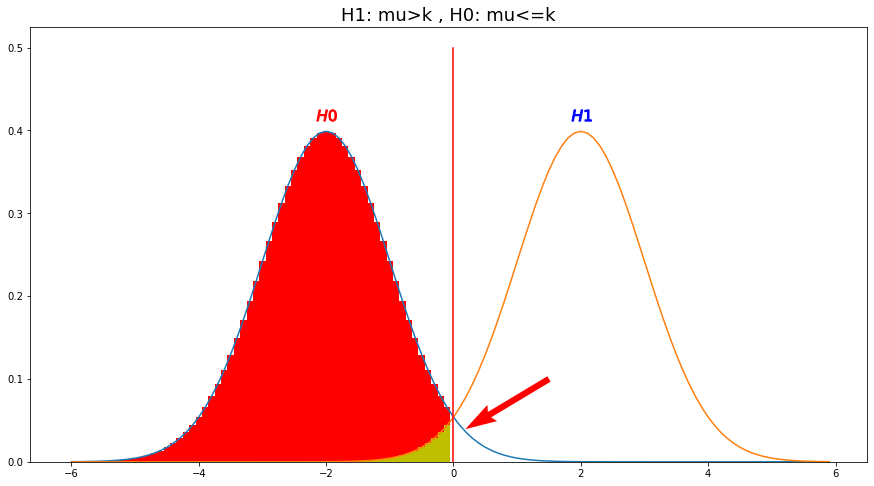

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(74):
    if y1[i]>y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu>k , H0: mu<=k', fontsize=18);

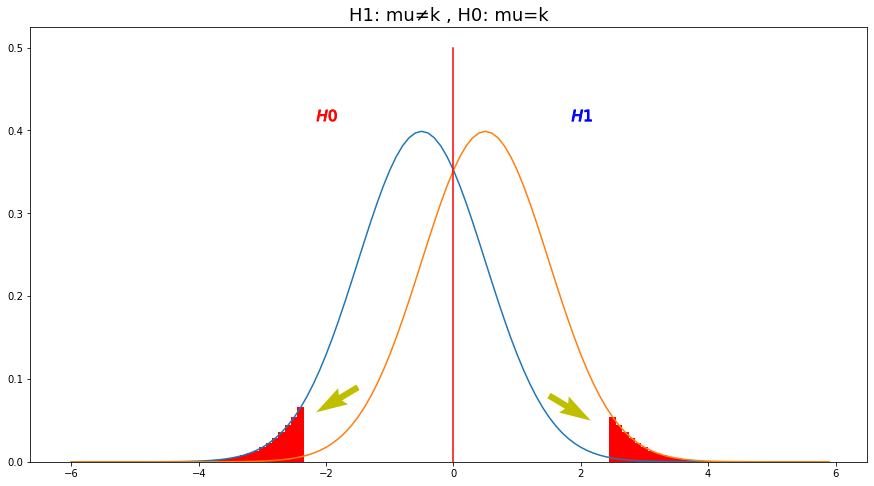

In [5]:
y1=[norm.pdf(x, -.5, 1) for x in x]
y2=[norm.pdf(x, .5, 1) for x in x]

plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.08, 1, -0.6, color='y', scale=20)  # para pintar una flecha
plt.quiver(-1.5, 0.09, -1, -0.6, color='y', scale=20)

for i in range(85, 100):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y2[i], width=0.1, color='r')

for i in range(37):
    if y1[i]>=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu≠k , H0: mu=k', fontsize=18);

# Ejemplo estudio farmaceutico

Supongamos que una compañia farmaceutica crea un medicamento para manejar la diabetes.

Se sabe que cualquier nivel de hemoglobina A1c por debajo del 5,7% es considerado normal.
La compañia realiza un estudio de un nuevo medicamento con 100 voluntarios.

+ Hipotesis:
$$H0: \mu \geq 5.7$$
$$H1: \mu < 5.7$$


Los resultados del estudio son $\bar{x}=5.1$, $s=1.6$


¿La prueba es suficiente para rechazar H0?

In [6]:
import numpy as np
from scipy.stats import t

In [7]:
# a manita

mu=5.7  # media poblacional


mu_hat=5.1  # media del estudio, media muestral
std_hat=1.6  # std del estudio, std muestral

n=100

In [8]:
t_test=(mu_hat - mu)/(std_hat/np.sqrt(n))

t_test

-3.750000000000003

In [9]:
dof=n-1  # grados de libertad

dof

99

In [13]:
p_value=t(df=dof).cdf(t_test)   # p-valor

p_value

0.0001489332089038242

In [14]:
# lo mismo, ...o casi

from scipy.stats import ttest_1samp

In [16]:
pacientes=np.random.normal(mu_hat, std_hat, n)

pacientes[:10]

array([1.90546262, 3.49229705, 7.91937075, 4.16856203, 2.81584402,
       2.23653586, 4.81161072, 6.06473493, 2.4987416 , 4.11993256])

In [17]:
t_test=ttest_1samp(pacientes, mu)

t_test

Ttest_1sampResult(statistic=-3.809226477653407, pvalue=0.00024201018371819733)

In [18]:
t_test.statistic

-3.809226477653407

In [19]:
t_test.pvalue

0.00024201018371819733

**Conclusion:**

Si buscamos un intervalo de confianza del 99,9%, entonces $umbral=0.001$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Ejemplo Altura

Estudio media altura humana, 100 individuos.

+ Hipotesis:
$$H0: \mu \leq 1.7$$
$$H1: \mu > 1.7$$


Los resultados del estudio son $\bar{x}=1.72$, $s=0.2$


¿La prueba es suficiente para rechazar H0?

In [23]:
# a mano

t_test=(1.72 - 1.7)/(0.2 / np.sqrt(100))

p_value = 1 - t(df=99).cdf(t_test)

p_value

0.15987423706965065

In [25]:
t_test=ttest_1samp(np.random.normal(1.72, 0.2, 100), 1.7)

t_test

Ttest_1sampResult(statistic=1.4330533230047242, pvalue=0.15499303364629705)

In [26]:
t_test.pvalue

0.15499303364629705

**Conclusion**

Si buscamos un intervalo de confianza del 95%, entonces $umbral=0.05$

El pvalor obtenido es mayor que el umbral, por lo tanto no podemos rechazar H0.

**OJO**

Si buscamos un intervalo de confianza del 80%, entonces $umbral=0.2$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Z-test  

$N(\mu, \sigma)$

supongamos $\sigma=0.25$ , std de la poblacion

In [ ]:
!pip install statsmodels

In [27]:
from statsmodels.stats import weightstats as w

In [28]:
z_score, p_value = w.ztest(np.random.normal(1.72, 0.25, 100), value=1.7)

z_score, p_value

(1.1905516611803897, 0.23382963775133514)

# Testeo de hipotesis con 2 muestras

Ya no se estudia una muestra frente a la poblacion, sino que se comparan dos muestras entre si.

En primer lugar, se considera la diferencia de medias:

$$\mu=\mu_1 - \mu_2$$

El tipo de test cambia:

**1)** 

$$H0: \mu \geq 0$$
$$H1: \mu < 0$$
    
    
**2)** 

$$H0: \mu \leq 0$$
$$H1: \mu > 0$$
    
    
**3)** 

$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

Por otro lado hay que considerar la independencia de las muestras.

Si son dependientes (matched pairs), entonces se usa el t-test:

+ Welch's t-test


$$t=\frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1^2}+\frac{s_2^2}{n_2^2}}}$$

In [29]:
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

In [30]:
b_pres=pd.read_csv('../data/blood_pressure 2.csv')

b_pres.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [31]:
ttest_rel(b_pres.before, b_pres.after)

Ttest_relResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48)

In [32]:
ttest_1samp(b_pres.before - b_pres.after, 0)

Ttest_1sampResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48)

In [33]:
b_pres.before.mean(), b_pres.after.mean()

(136.5369525056993, 99.23670008065476)

**Conclusion**

El p_Value tiende a cero. Podemos rechazar H0.

### independencia

In [34]:
ab_test=pd.read_csv('../data/ab_test.csv')

ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [35]:
ttest_ind(ab_test.a, ab_test.a)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [36]:
ttest_ind(ab_test.a, ab_test.b)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447344)

In [44]:
ab_test.a.mean(), ab_test.b.mean()

(9.355400000000001, 12.466)

In [37]:
ab_test.a.std(), ab_test.b.std()

(5.2352701858039135, 6.4912553422560215)

In [41]:
ttest_ind(ab_test.a, ab_test.b, equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828827)

In [42]:
#help(ttest_ind)

**Test de independencia**

+ H0 : Completa dependencia (son lo mismo)
+ H1 : son independientes


**Conclusion**

Son independientes, el pvalor es menor que el umbral, por lo que podemos rechazar H0.
Al ser independientes, ya no se usa el t-test, se usa el z-test.


**Ahora queremos ver si existe una diferenecia significativa entre a y b.**

In [43]:
z_score, p_value = w.ztest(ab_test.a, ab_test.b,
                           value=0, 
                           alternative='two-sided',
                           usevar='pooled',
                           ddof=1)

z_score, p_value

(-2.637533181209767, 0.008351145504323936)

**Conclusion**

El p_value es menor que el umbral, dependiendo del intervalo de confianza, pero siendo asi podemos rechazar H0, y decir que existe una diferencia significativa entre ambas muestras, una pagina web funciona mejor que otra.

## Normalidad - Test de Shapiro

**H0: es Normal**


**H1 : NO es Normal**

In [45]:
from scipy.stats import shapiro

In [46]:
shapiro(ab_test.a)

ShapiroResult(statistic=0.9778033494949341, pvalue=0.46350130438804626)

In [47]:
shapiro(ab_test.b)

ShapiroResult(statistic=0.9656312465667725, pvalue=0.15291424095630646)

**normalizando**

In [49]:
# a mano

a_normal=(ab_test.a - ab_test.a.mean())/(ab_test.a.std()/np.sqrt(len(ab_test.a)))

a_normal[:10]

0   -12.271283
1    -4.423950
2     5.922102
3     0.465437
4    -3.181344
5    -6.193314
6    -9.178272
7    -2.857185
8    -2.776146
9   -11.474393
Name: a, dtype: float64

In [52]:
len(ab_test.a)

50

In [51]:
ab_test.a[:10]

0     0.27
1     6.08
2    13.74
3     9.70
4     7.00
5     4.77
6     2.56
7     7.24
8     7.30
9     0.86
Name: a, dtype: float64

In [50]:
shapiro(a_normal)

ShapiroResult(statistic=0.9778033494949341, pvalue=0.46350130438804626)

In [53]:
shapiro((ab_test.b - ab_test.b.mean())/(ab_test.b.std()/np.sqrt(len(ab_test.b))))

ShapiroResult(statistic=0.9656312465667725, pvalue=0.15291424095630646)